## Exercise:
1. Make a 10 second recording using a portable computer and the built in microphone and sound card.  What is the sampling frequency and amplitude resolution of the audio signal recorded?

After receiving the audio properties the sampling frequency is found to be 48.000 Hz (48.0 kHz).
The amplitude resolution is a 64-bit floating point number, which corresponds to a high amplitude resolution.

2. Plot the amplitude as a function of time and frequency, and the phase response as a function of frequency.
3. Change the sampling frequency and amplitude resolution of the recording system and record a second signal. What are the differences between the first and second recording?
4. Using another sound source try recording the lowest and loudest sounds you can generate. Compare the amplitude of these signals, what can you say about the dynamic range of the system?   

In [125]:
# Importing packages and libraries
# https://klyshko.github.io/teaching/2019-02-22-teaching
import matplotlib.pyplot as plt
from scipy.io import wavfile
import soundfile as sf
import numpy as np
%matplotlib inline
import pyaudio

In [126]:
# Retrieve audio properties
audio = "audio stereo.mp3"
#data = "audio mono.mp3"
#data = "audio.wav"
audio = "test.mp3"
print(sf.info(audio),"\n")

data, Fs = sf.read(audio)
samples = np.float64(data.shape[0])
channels = data.shape[1]
duration = samples / Fs

print(f"Samples/Sample points: {samples}")
print(f"Channels: {channels}")
print(f"Sample rate: {Fs}")
print(f"Data type: {samples.dtype}")
print(f"Duration: {duration}")


test.mp3
samplerate: 48000 Hz
channels: 2
duration: 10.345 s
format: MPEG-1/2 Audio [MP3]
subtype: MPEG Layer III [MPEG_LAYER_III] 

Samples/Sample points: 496559.0
Channels: 2
Sample rate: 48000
Data type: float64
Duration: 10.344979166666667


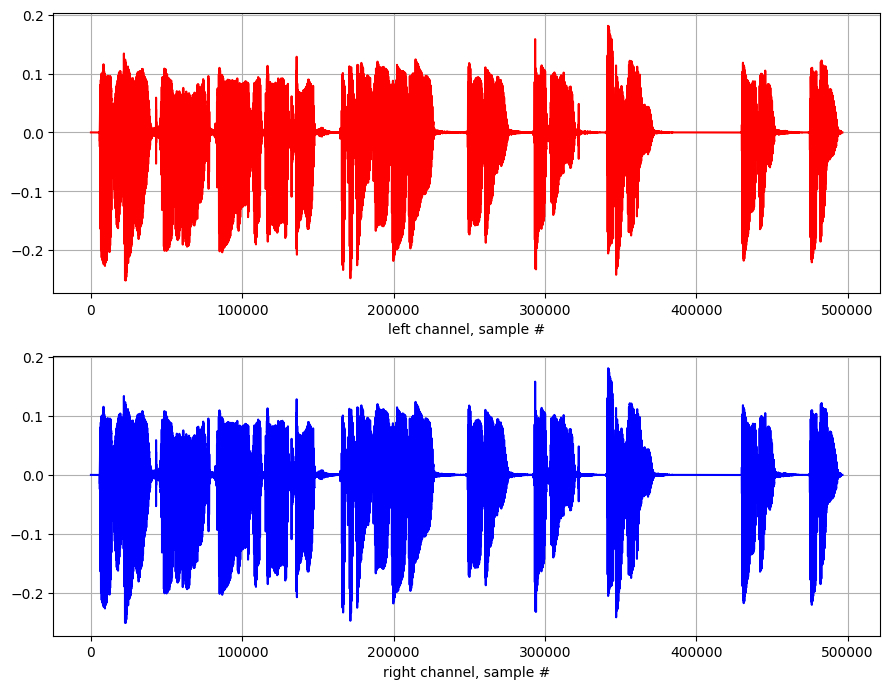

In [127]:
# Plotting sound signal on each channel
plt.subplot(2,1,1)
plt.plot(data[:,0], 'r')
plt.xlabel("left channel, sample #")
plt.grid()
plt.subplot(2,1,2)
plt.plot(data[:,1], 'b')
plt.xlabel("right channel, sample #")
plt.grid()
plt.tight_layout()
plt.show()

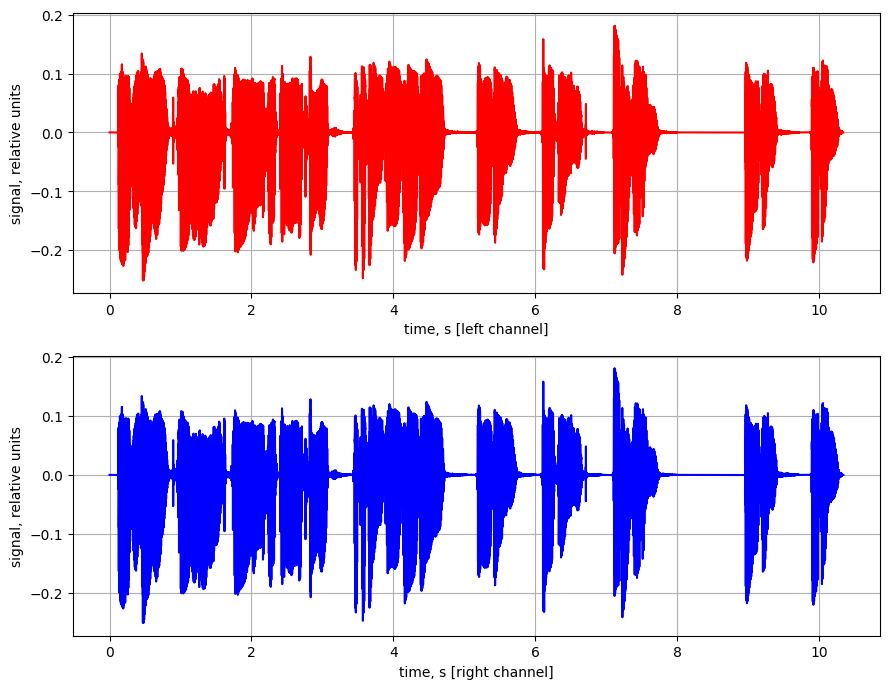

In [128]:
# Plotting sound signal on each channel with correct time axis
time = np.arange(samples) / samples * duration
plt.subplot(2,1,1)
plt.plot(time,data[:,0], 'r')
plt.xlabel("time, s [left channel]")
plt.ylabel("signal, relative units")
plt.grid()
plt.subplot(2,1,2)
plt.plot(time,data[:,1], 'b')
plt.xlabel("time, s [right channel]")
plt.ylabel("signal, relative units")
plt.grid()
plt.tight_layout()
plt.show()

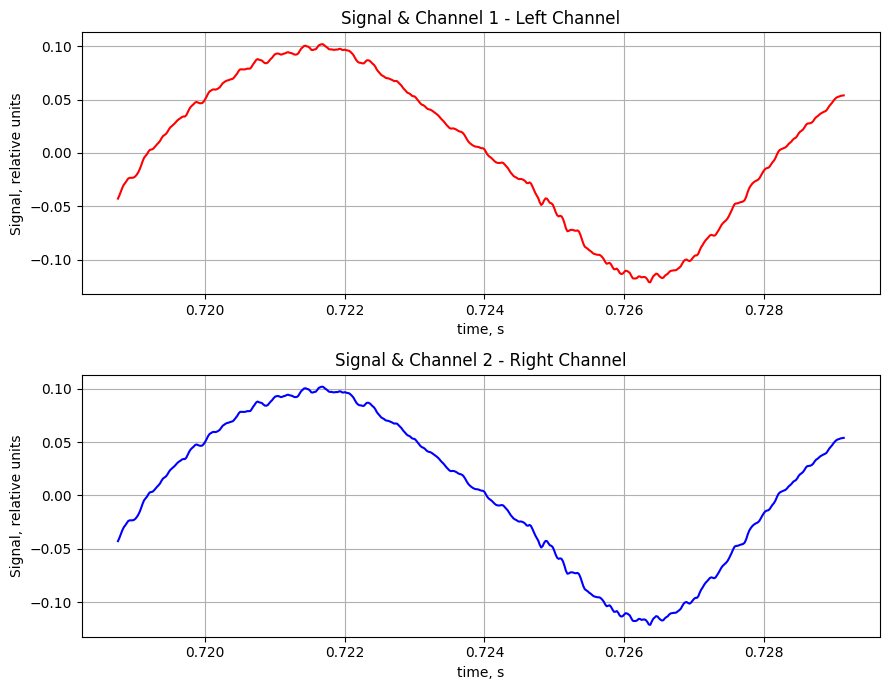

In [129]:
# Splitting each sound channel
signal_1 = data[:,0]
signal_2 = data[:,1]

plt.subplot(2,1,1)
plt.title("Signal & Channel 1 - Left Channel")
plt.plot(time[34500:35000], signal_1[34500:35000], 'r')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.grid()
plt.subplot(2,1,2)
plt.title("Signal & Channel 2 - Right Channel")
plt.plot(time[34500:35000], signal_2[34500:35000], 'b')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.grid()
plt.tight_layout()
plt.show()

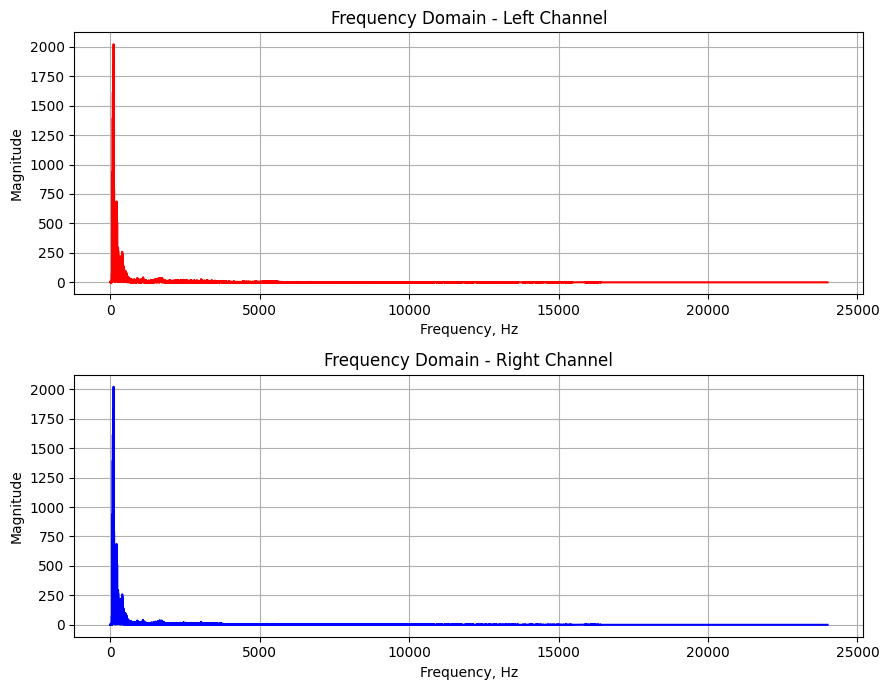

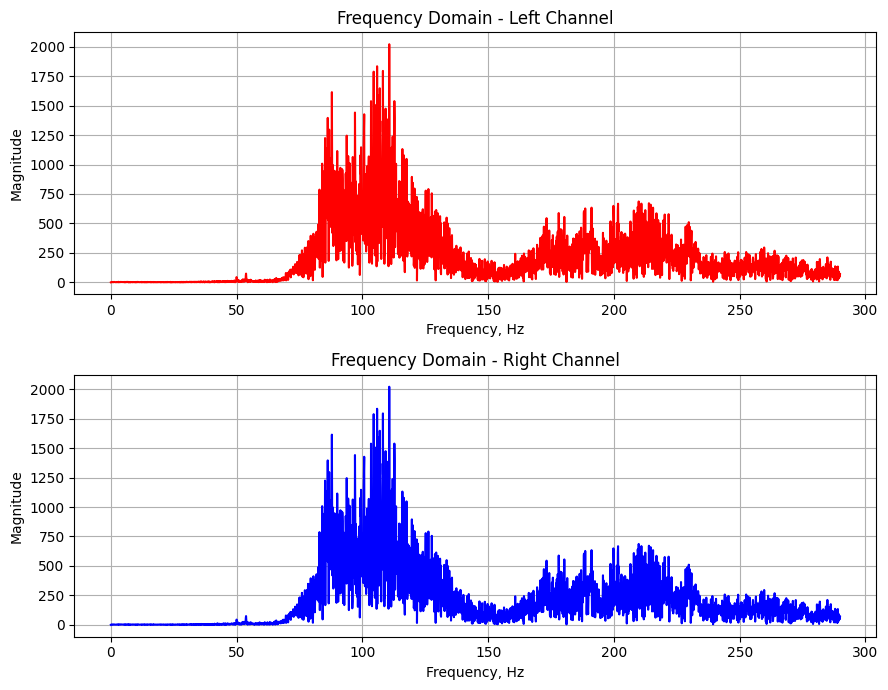

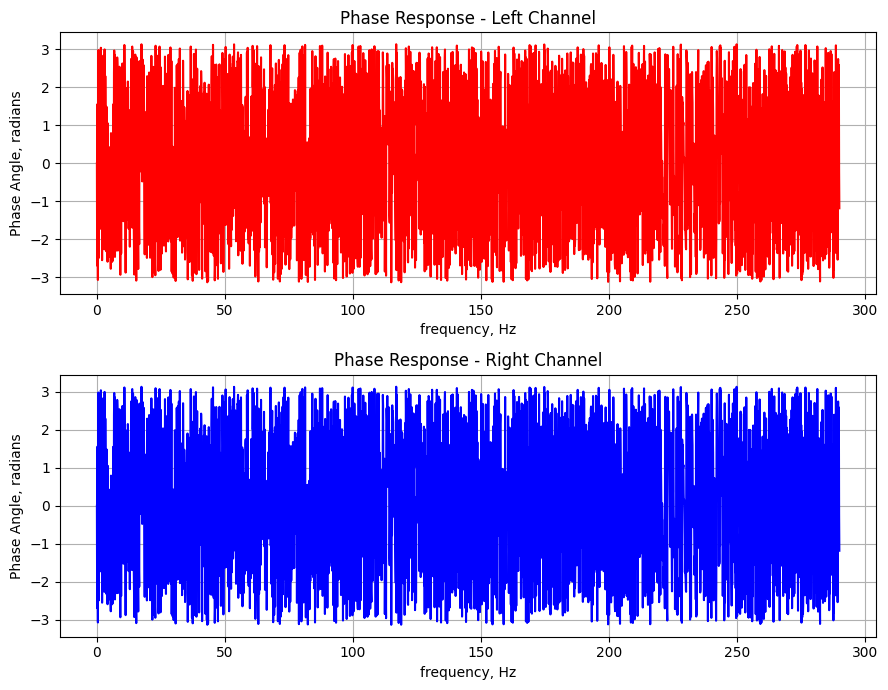

In [150]:
# Transform signal from time to frequency domain
# Compute the FFT of your audio signals
fft_spectrum_1 = np.fft.rfft(signal_1)
fft_spectrum_2 = np.fft.rfft(signal_2)

# Calculate the magnitude and phase of the FFT components
fft_spectrum_abs1 = np.abs(fft_spectrum_1)
fft_spectrum_abs2 = np.abs(fft_spectrum_2)
phase_spectrum_1 = np.angle(fft_spectrum_1)
phase_spectrum_2 = np.angle(fft_spectrum_2)

# Calculate the corresponding frequencies
freq_1 = np.fft.rfftfreq(signal_1.size, d=1./Fs)
freq_2 = np.fft.rfftfreq(signal_2.size, d=1./Fs)

#print(f"FFT Spectrum Left Channel: \n{fft_spectrum_1}")
#print(f"|FFT Spectrum| Left Channel: \n{fft_spectrum_abs1}")
#print(f"FFT Spectrum Right Channel: \n{fft_spectrum_2}")
#print(f"|FFT Spectrum| Right Channel: \n{fft_spectrum_abs2}")
#print(f"Frequency Left Channel: \n{freq_1}")
#print(f"Frequency Right Channel: \n{freq_2}")
#print(f"Phase Angle Left Channel: \n{phase_spectrum_1}")
#print(f"Phase Angle Right Channel: \n{phase_spectrum_2}")

# Plotting the frequency content/spectrum
plt.subplot(2,1,1)
plt.title("Frequency Domain - Left Channel")
plt.plot(freq_1, fft_spectrum_abs1, 'r')
plt.xlabel("Frequency, Hz")
plt.ylabel("Magnitude")
plt.grid()
plt.subplot(2,1,2)
plt.title("Frequency Domain - Right Channel")
plt.plot(freq_2, fft_spectrum_abs2, 'b')
plt.xlabel("Frequency, Hz")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()

plt.subplot(2,1,1)
plt.title("Frequency Domain - Left Channel")
plt.plot(freq_1[:3000], fft_spectrum_abs1[:3000], 'r')
plt.xlabel("Frequency, Hz")
plt.ylabel("Magnitude")
plt.grid()
plt.subplot(2,1,2)
plt.title("Frequency Domain - Right Channel")
plt.plot(freq_2[:3000], fft_spectrum_abs2[:3000], 'b')
plt.xlabel("Frequency, Hz")
plt.ylabel("Magnitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the phase response
start_freq = 0
end_freq = 3000
plt.subplot(2, 1, 1)
plt.title("Phase Response - Left Channel")
plt.plot(freq_1[start_freq:end_freq], phase_spectrum_1[start_freq:end_freq], 'r')
plt.xlabel("frequency, Hz")
plt.ylabel("Phase Angle, radians")
plt.grid()
plt.subplot(2, 1, 2)
plt.title("Phase Response - Right Channel")
plt.plot(freq_2[start_freq:end_freq], phase_spectrum_2[start_freq:end_freq], 'b')
plt.xlabel("frequency, Hz")
plt.ylabel("Phase Angle, radians")
plt.grid()
plt.tight_layout()
plt.show()